# Feature analysis

In questo Notebook verranno calcolate le correlazioni tra le features numeriche appartenenti a un dataset.

Il dataset in questione è un file xslsx composto da due sheets: uno che raccoglie dati relativi a giocatori di calcio in una specifica stagione, l'altro sheet raccoglie i dati relativi agli infortuni di questi giocatori nelle relative stagioni.

In [1]:
# pandas è una libreria per Data Analysis
import pandas as pd

# seaborn è una libreria per la visualizzazione di dati
import seaborn as sb

# numpy è una libreria che implementa funzioni matematiche, e strutture dati
import numpy as np

## Data import

Qui vengono importati i dati provenienti dal dataset. In particolare vengono costruiti due DataFrame della libreria pandas: uno per ogni sheet del file excel.

In [2]:
dataset_full_path = "./"
dataset_filename = "dataset.xlsx"

players = pd.read_excel(dataset_full_path + dataset_filename)
injuries = pd.read_excel(dataset_full_path + dataset_filename)

### Data filtering

Vengono selezionati solamente i dati relativi all'anno 2015.

Il dataset è ordinato utilizzando come chiave la stagione (Season_ID), quindi si è sicuri del fatto che le prime 741 righe del primo sheet, e le prime 734 del secondo sheet sono relative alla stagione del 2015.

In [3]:
players_in_specific_season = players[players["Season_ID"] == 2015]
injuries_in_specific_season = injuries[injuries["Season_ID"] == 2015]

# tolgo le feature non importanti e non numeriche
players_in_specific_season.drop([
        "Player_ID",
        "Surname",
        "First_name",
        "Player",
        "Season_ID",    # al momento c'è solo il 2015, non serve
        "Club",         # potrebbe essere rilevante
        "POSITION",     # potrebbe essere rilevante
        "Date_of_birth",# potrebbe essere rilevante
    ],
    axis = 'columns',
    inplace = True)

E:\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Players in 2015

In [4]:
players_in_specific_season

,Starting_11,Goals,Assists,Owngoals,Substitutions_on,Substitutions_off,Yellow_cards,Red_yellow_cards,Red_cards,Penalty_goals,Year_of_birth,Age
0,14,7,8,0,10,9,3,0,0,1,1978,37
1,22,0,1,0,4,11,5,0,0,0,1984,31
2,28,0,0,0,0,1,7,0,0,0,1981,34
3,0,0,0,0,1,0,0,0,0,0,1977,38
4,35,13,4,0,2,20,4,0,0,1,1979,36
...,...,...,...,...,...,...,...,...,...,...,...,...
740,1,0,0,0,5,0,0,0,0,0,1996,19
2226,0,0,0,0,0,0,0,0,0,0,1989,26
2237,13,0,0,0,0,9,4,1,0,0,1995,20
2238,3,0,1,0,6,1,0,0,0,0,1985,30


### Injuries in 2015

In [5]:
injuries_in_specific_season

,Player_ID,Surname,First_name,Player,Club,Season_ID,Starting_11,Goals,Assists,Owngoals,Substitutions_on,Substitutions_off,Yellow_cards,Red_yellow_cards,Red_cards,Penalty_goals,POSITION,Date_of_birth,Year_of_birth,Age
0,10,Klose,Miroslav,Miroslav Klose,SS Lazio,2015,14,7,8,0,10,9,3,0,0,1,Centre-Forward,1978-06-09,1978,37
1,2865,Lichtsteiner,Stephan,Stephan Lichtsteiner,Juventus FC,2015,22,0,1,0,4,11,5,0,0,0,Right-Back,1984-01-16,1984,31
2,3417,Burdisso,Nicolás,Nicolás Burdisso,Genoa CFC,2015,28,0,0,0,0,1,7,0,0,0,Centre-Back,1981-04-12,1981,34
3,3507,Abbiati,Christian,Christian Abbiati,AC Milan,2015,0,0,0,0,1,0,0,0,0,0,Goalkeeper,1977-07-08,1977,38
4,3713,Maccarone,Massimo,Massimo Maccarone,FC Empoli,2015,35,13,4,0,2,20,4,0,0,1,Centre-Forward,1979-09-06,1979,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,256361,Verde,Daniele,Daniele Verde,Frosinone Calcio,2015,1,0,0,0,5,0,0,0,0,0,Right Winger,1996-06-20,1996,19
2226,57644,Gomis,Lys,Lys Gomis,Torino FC,2015,0,0,0,0,0,0,0,0,0,0,Goalkeeper,1989-10-06,1989,26
2237,197473,Grassi,Alberto,Alberto Grassi,SSC Napoli,2015,13,0,0,0,0,9,4,1,0,0,Central Midfield,1995-03-07,1995,20
2238,37941,Zúñiga,Camilo,Camilo Zúñiga,SSC Napoli,2015,3,0,1,0,6,1,0,0,0,0,Right-Back,1985-12-14,1985,30


## Scatter plots

Per avere un'idea di come le features siano correlate tra loro.

Se un grafico risulta particolarmente scattered (sparpagliato), vuol dire che molto probabilmente le features rappresentate da quel grafico, non sono fortemente correlate tra di loro.

In [6]:
# graphs config
%matplotlib inline
sb.set_style("whitegrid")

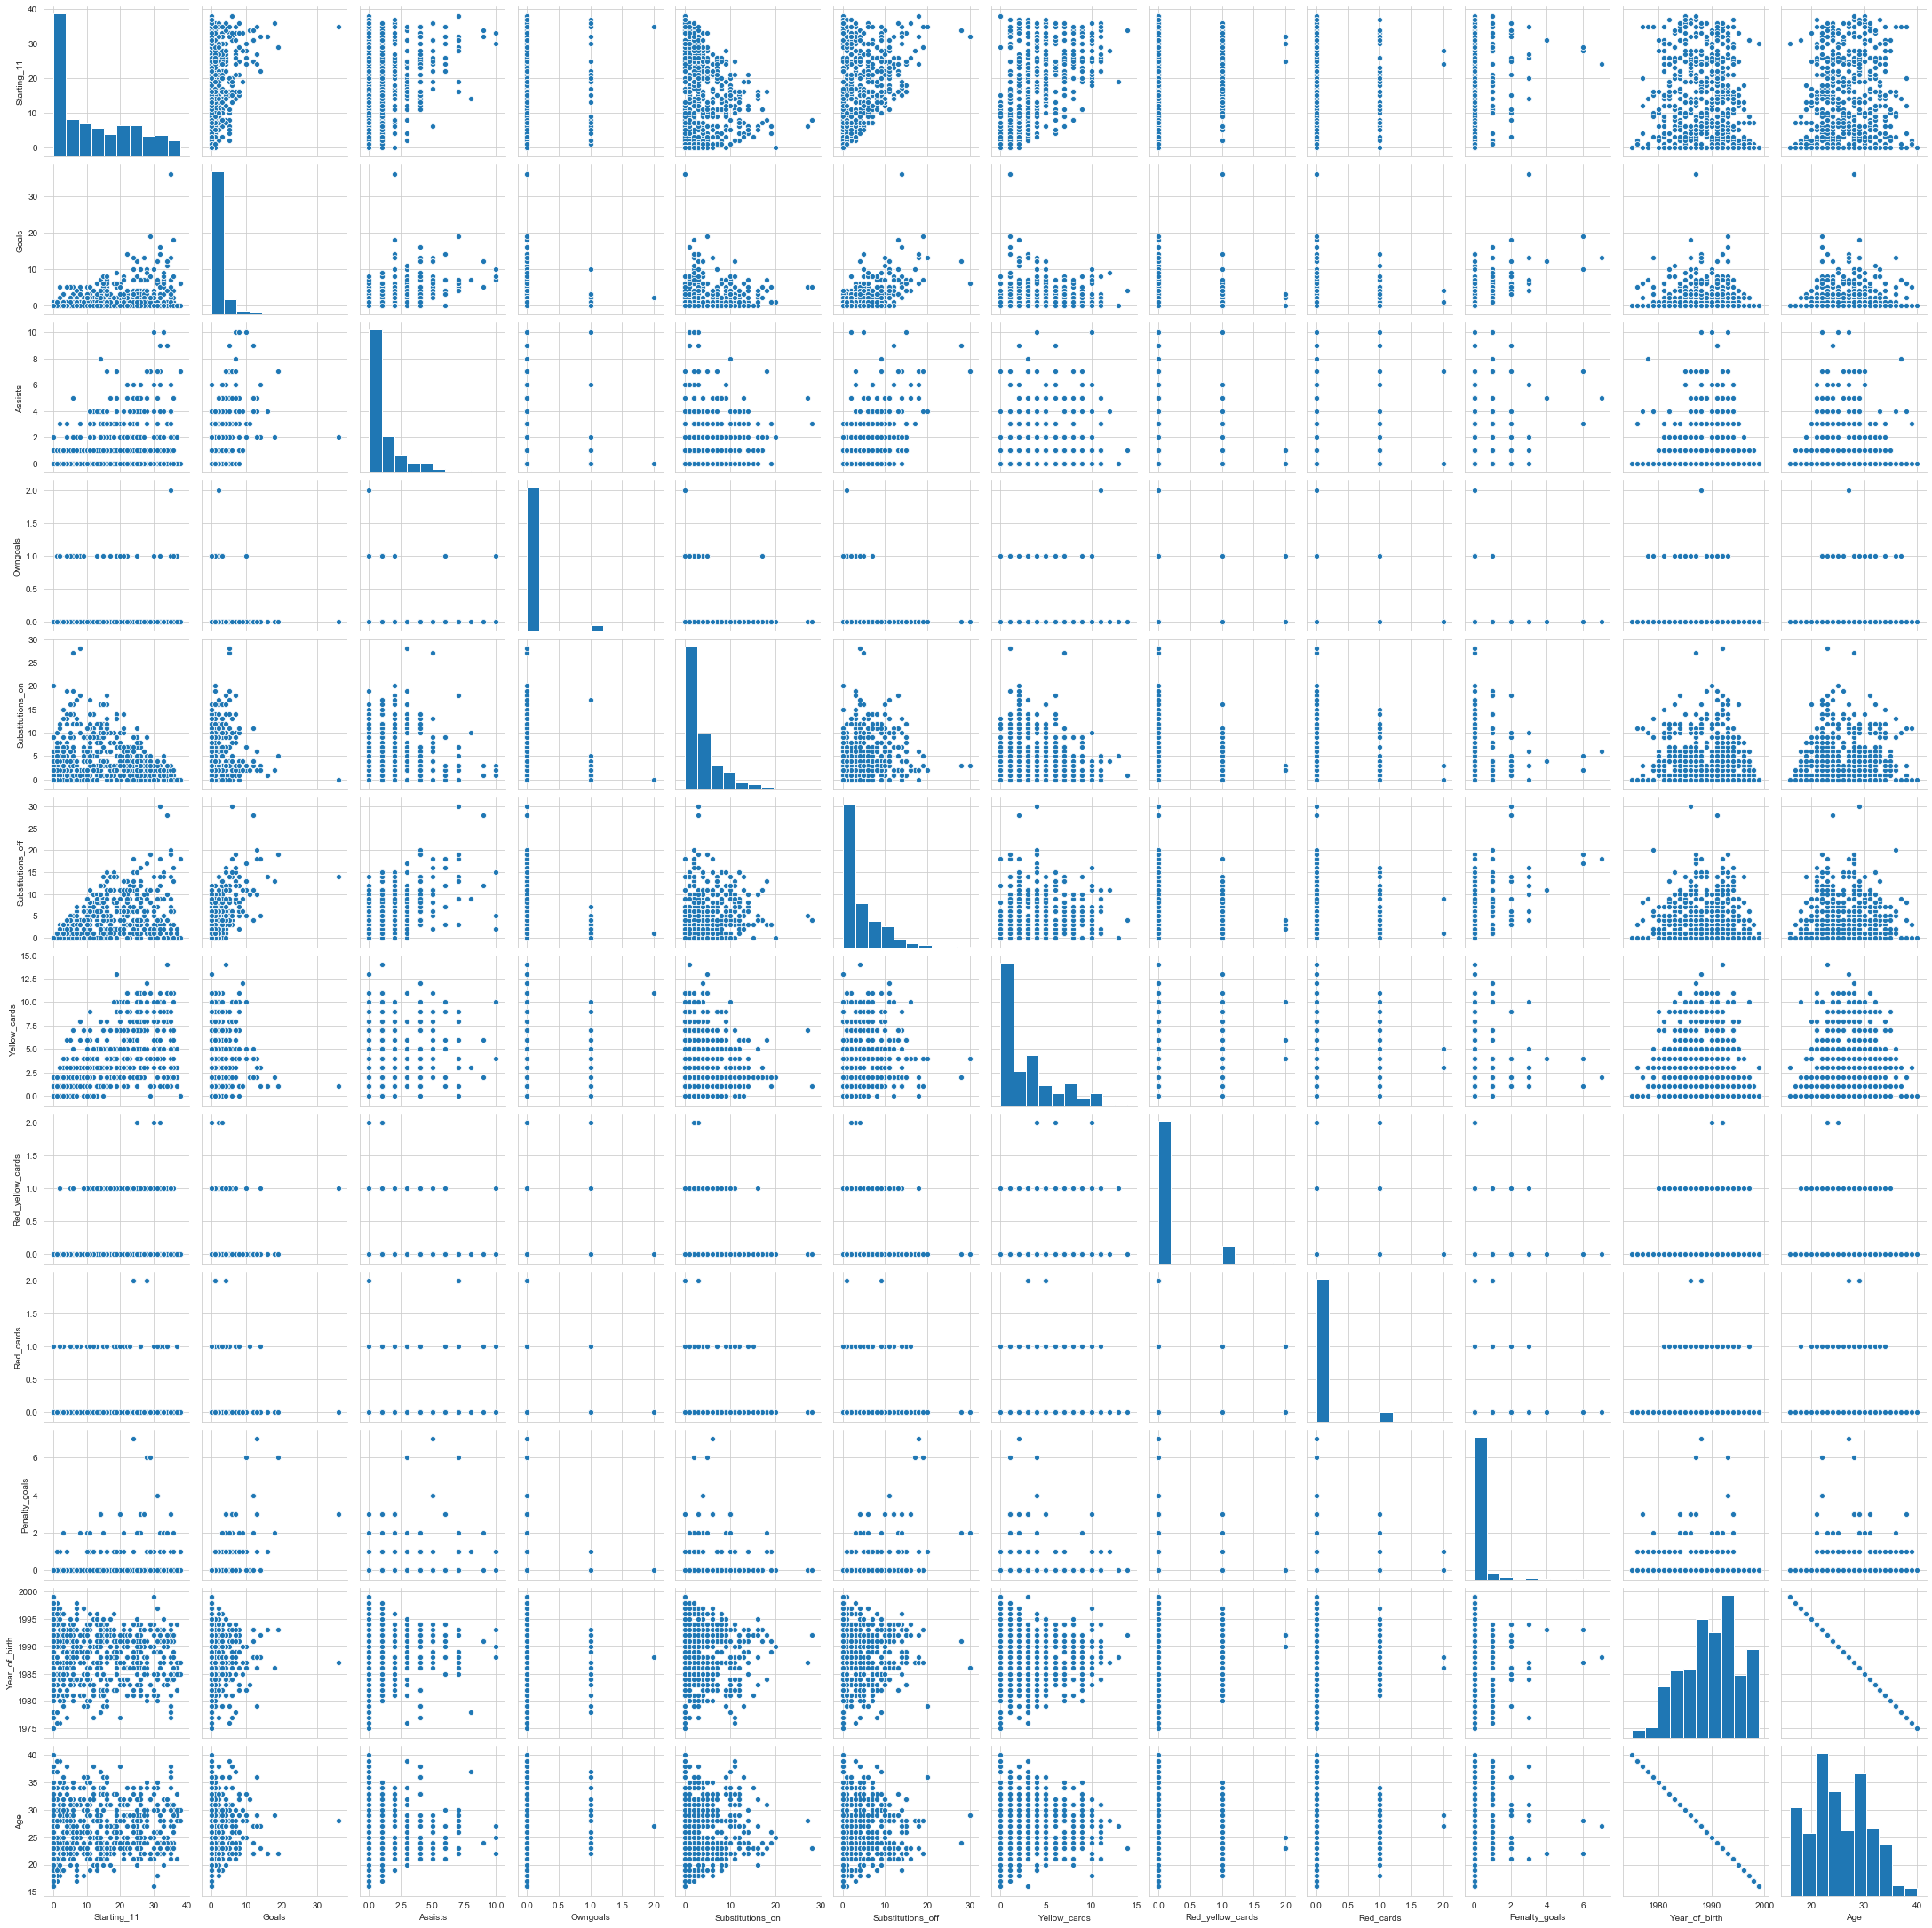

In [7]:
sb.pairplot(players_in_specific_season) # scatter plot

## Spearman correlation

In questo paragrafo si calcola la matrice di correlazione tra le features, utilizzando la Spearman correlation.

 Quando X e Y Y sono perfettamente monotonicamente correlati, il coefficiente di correlazione di Spearman è uguale a 1. [[Wikipedia](https://it.wikipedia.org/wiki/Coefficiente_di_correlazione_per_ranghi_di_Spearman)]


In [8]:
# init
correlation_matrix = []

# per ogni nome di colonna del DataFrame relativo a tutti i giocatori nel 2015
for i in (players_in_specific_season.columns):
    # sto costruendo una matrice, e questa è l'i-esima colonna di questa matrice
    column_i = []
    
    # per ogni nome di colonna del DataFrame relativo a tutti i giocatori nel 2015
    for j in (players_in_specific_season.columns):
        
        # calcola la correlazione tra l'i-esimo vettore delle features, e il j-esimo vettore delle features
        correlation = players_in_specific_season[i].corr(players_in_specific_season[j], method='spearman')
        # aggiungi il coefficiente di correlazione, nel vettore colonna che rappresenta li-esima colonna
        column_i.append(correlation)
        
    # aggiungi il vettore colonna alla matrice di correlazione
    correlation_matrix.append(column_i)

In [9]:
# preparing to be printed out, just aesthetics using pandas DataFrame
correlation_matrix = np.matrix(correlation_matrix)
correlation_matrix = pd.DataFrame(correlation_matrix, columns = players_in_specific_season.columns)
correlation_matrix.index = players_in_specific_season.columns

In [10]:
correlation_matrix

,Starting_11,Goals,Assists,Owngoals,Substitutions_on,Substitutions_off,Yellow_cards,Red_yellow_cards,Red_cards,Penalty_goals,Year_of_birth,Age
Starting_11,1.000000,0.561893,0.553117,0.118941,0.290902,0.642845,0.803885,0.273390,0.162060,0.215183,-0.431970,0.431970
Goals,0.561893,1.000000,0.613980,0.019976,0.450414,0.660310,0.477598,0.134434,0.137862,0.468104,-0.260027,0.260027
Assists,0.553117,0.613980,1.000000,-0.006762,0.442916,0.653010,0.478747,0.125209,0.140950,0.329177,-0.191002,0.191002
Owngoals,0.118941,0.019976,-0.006762,1.000000,-0.052970,-0.013873,0.101067,0.044065,0.140726,-0.031967,-0.099252,0.099252
Substitutions_on,0.290902,0.450414,0.442916,-0.052970,1.000000,0.619201,0.398665,0.097979,0.079933,0.211091,-0.255093,0.255093
Substitutions_off,0.642845,0.660310,0.653010,-0.013873,0.619201,1.000000,0.598057,0.149724,0.122797,0.341303,-0.284474,0.284474
Yellow_cards,0.803885,0.477598,0.478747,0.101067,0.398665,0.598057,1.000000,0.300242,0.162923,0.095868,-0.348938,0.348938
Red_yellow_cards,0.273390,0.134434,0.125209,0.044065,0.097979,0.149724,0.300242,1.000000,0.006293,-0.039195,-0.078142,0.078142
Red_cards,0.162060,0.137862,0.140950,0.140726,0.079933,0.122797,0.162923,0.006293,1.000000,0.041145,-0.119666,0.119666
Penalty_goals,0.215183,0.468104,0.329177,-0.031967,0.211091,0.341303,0.095868,-0.039195,0.041145,1.000000,-0.146260,0.146260
